In [1]:
%matplotlib inline
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

In [2]:
hidden_num='011001'

In [3]:
qc=QuantumCircuit(len(hidden_num)+1,len(hidden_num))

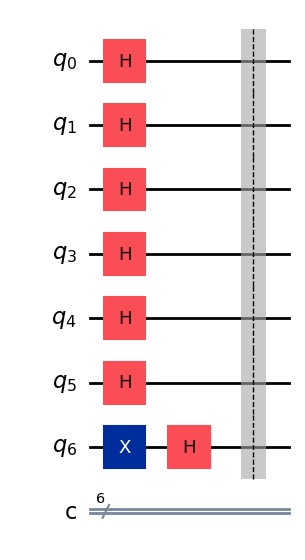

In [4]:
qc.h(range(len(hidden_num)))
qc.x(len(hidden_num))
qc.h(len(hidden_num))
qc.barrier()
qc.draw("mpl")

1 at index:0
0 at index:1
0 at index:2
1 at index:3
1 at index:4
0 at index:5


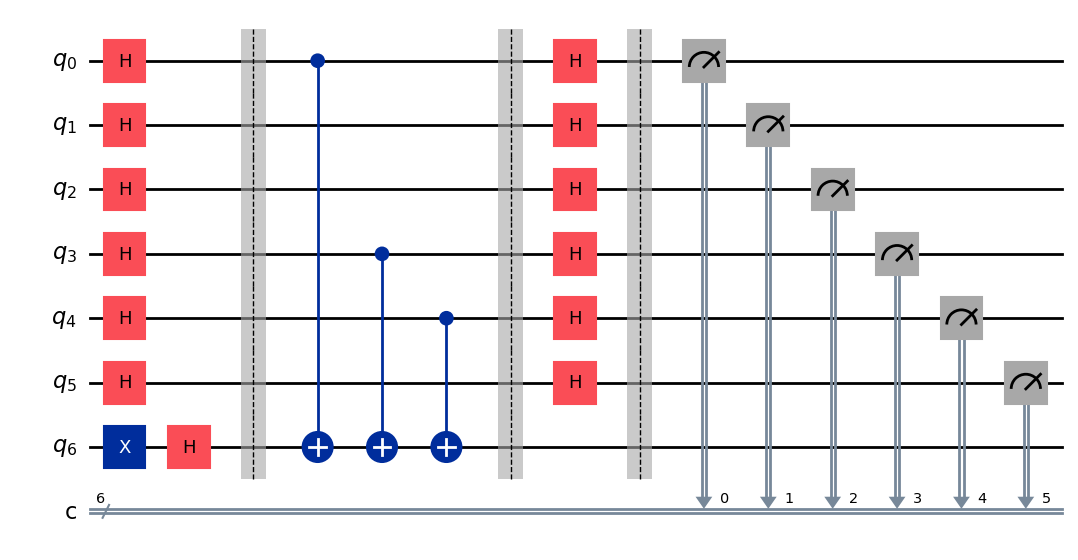

In [5]:
for index,num in enumerate(reversed(hidden_num)):
    print(f'{num} at index:{index}')
    if num == '1':
        qc.cx(index,len(hidden_num))
qc.barrier()
qc.h(range(len(hidden_num)))
qc.barrier()
qc.measure(range(len(hidden_num)),range(len(hidden_num)))
qc.draw("mpl")

    
    

In [6]:
backend=AerSimulator(method='automatic')
circuit=transpile(qc,backend)
out=backend.run(circuit,shots=1).result()
counts = out.get_counts()
print(counts)

{'011001': 1}


In [7]:
print(hidden_num)

011001


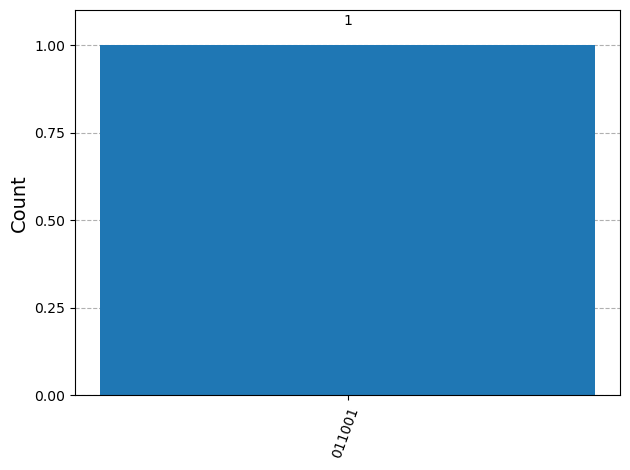

In [18]:
plot_histogram(counts)
plt.show()